In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [68]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [70]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


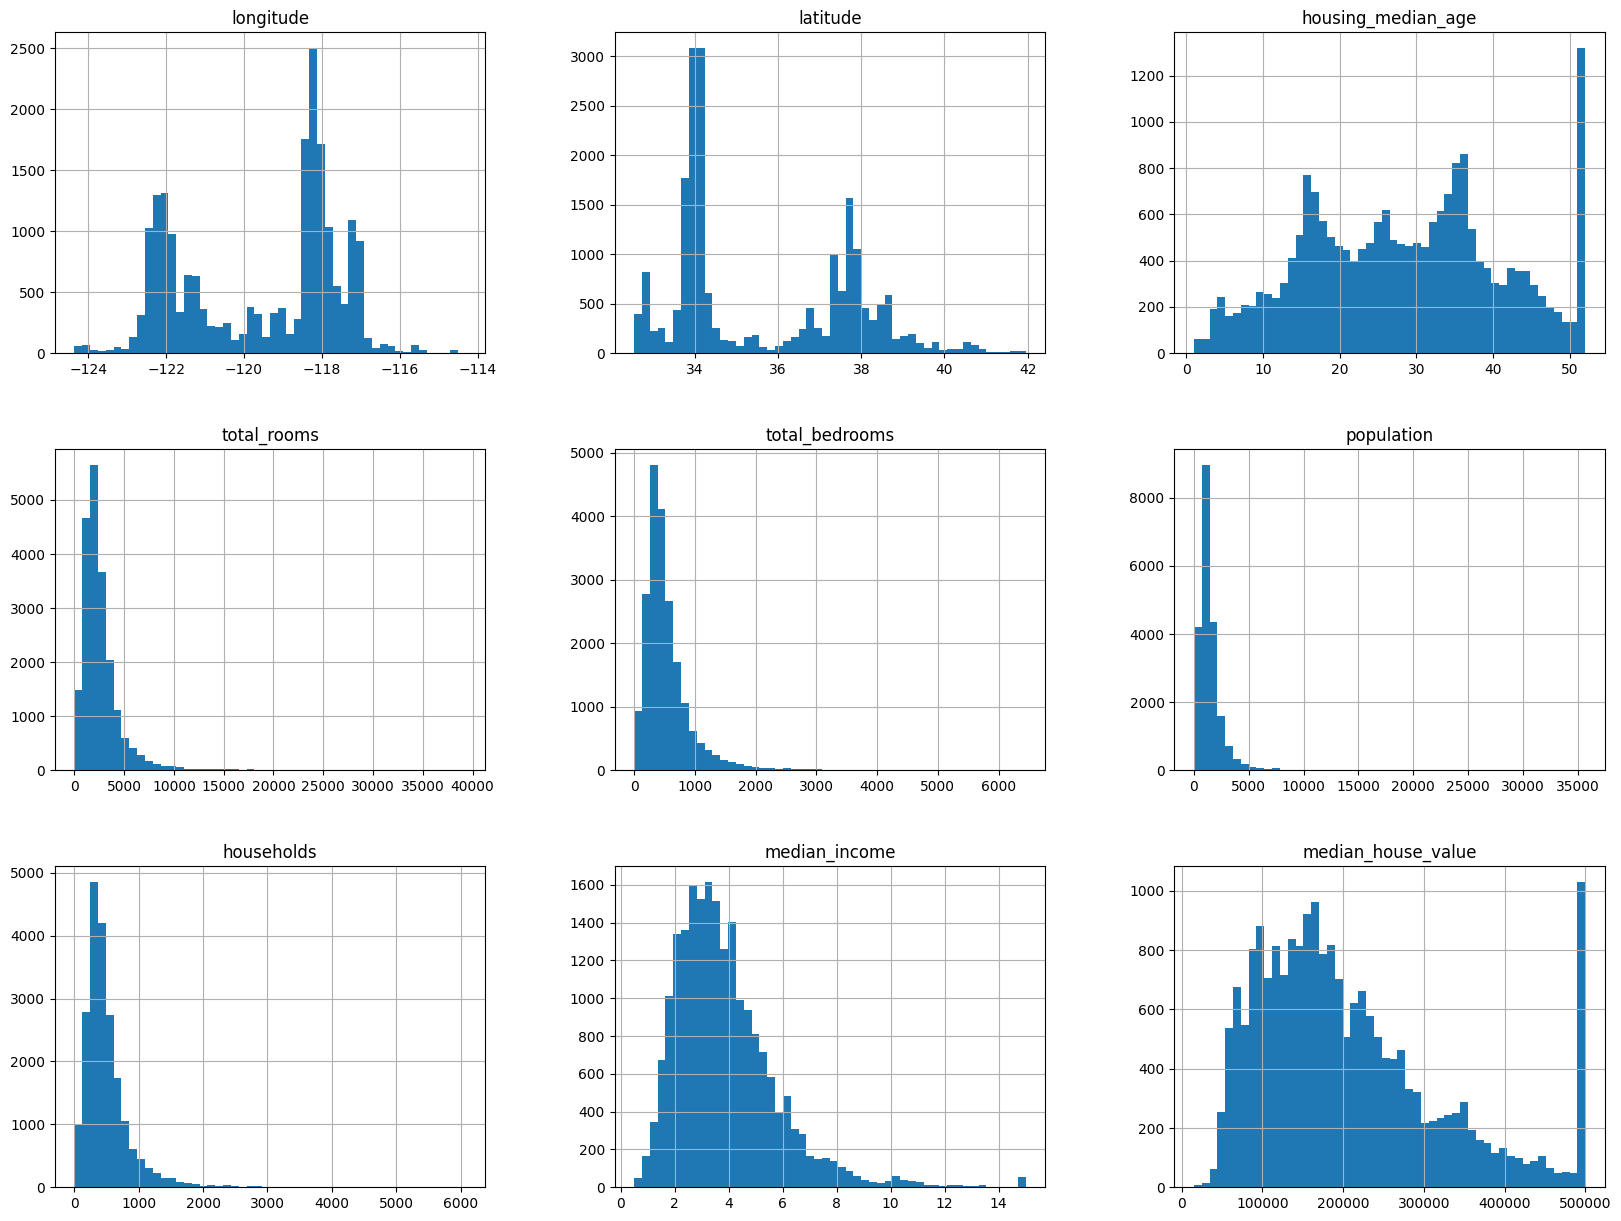

In [71]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [72]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [73]:
train_set.shape

(16512, 10)

In [74]:
df['income_cat'] = np.ceil(df["median_income"]/1.5)
df['income_cat'] = df["income_cat"].where(df["income_cat"] < 5, 5.0)

In [75]:
print(df["income_cat"].head())
print(df["income_cat"].dtype)
print(df["income_cat"].unique())

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64
float64
[5. 4. 3. 2. 1.]


In [76]:
del df['income_cat']

# Now recreate it properly
df['income_cat'] = np.ceil(df["median_income"] / 1.5)

# Cap values at 5 as you originally intended
df['income_cat'] = np.where(df['income_cat'] >= 5, 5, df['income_cat'])

# Convert to integers
df['income_cat'] = df['income_cat'].astype(int)

In [77]:
print(df["income_cat"].head())
print(df["income_cat"].dtype)
print(df["income_cat"].unique())

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: int64
int64
[5 4 3 2 1]


In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [79]:
df["income_cat"].value_counts()/len(df)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [80]:
for a in (strat_train_set, strat_test_set):
    a.drop(["income_cat"], axis=1, inplace=True)

In [81]:
df=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

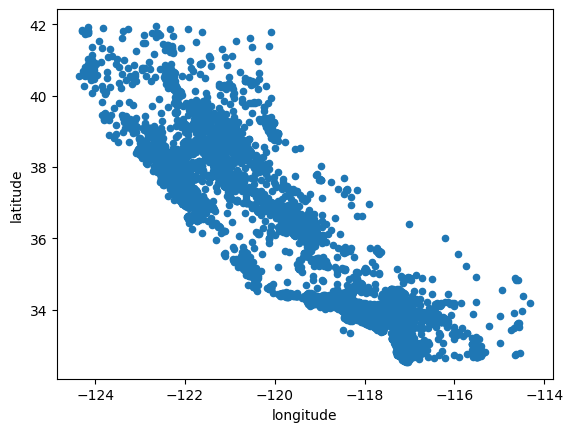

In [82]:
df.plot(kind="scatter", x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

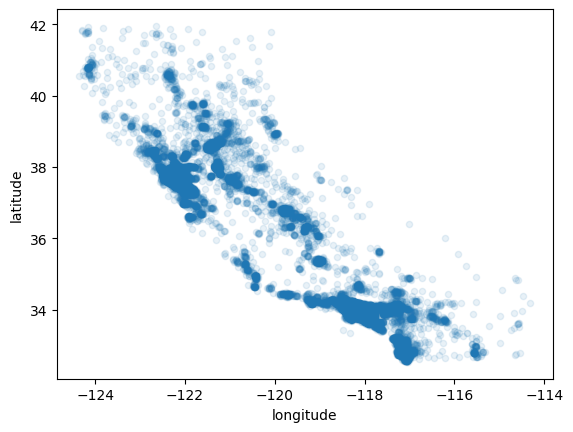

In [83]:
df.plot(kind="scatter", x='longitude', y='latitude',alpha=0.1)

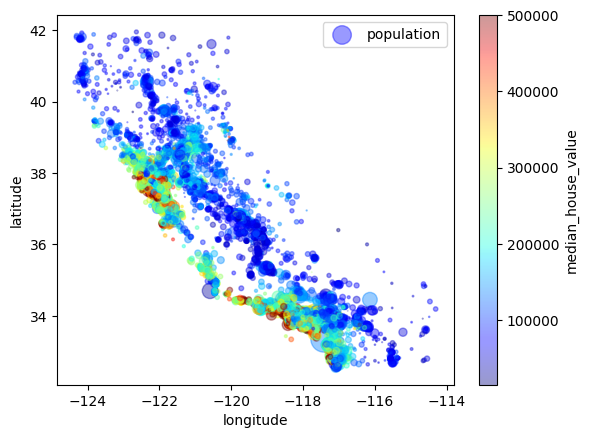

In [84]:
df.plot(kind='scatter', x="longitude",y="latitude", alpha=0.4,s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [85]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

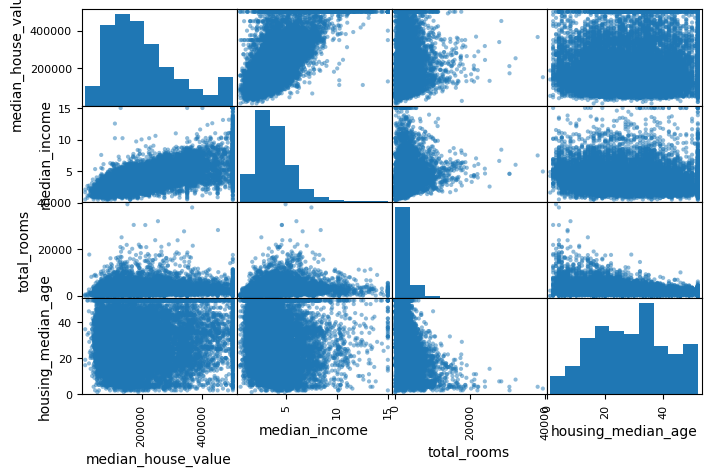

In [86]:
attri=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attri],figsize=(8,5))

<Axes: xlabel='median_income', ylabel='median_house_value'>

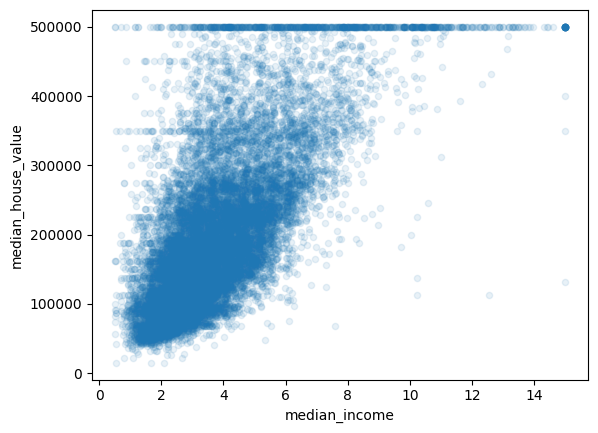

In [87]:
df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [88]:
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

In [89]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [90]:
df_num=df.drop("ocean_proximity", axis=1)

In [91]:
imputer.fit(df_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [92]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [93]:
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [94]:
x=imputer.transform(df_num)

In [95]:
df_tr=pd.DataFrame(x, columns=df_num.columns)

In [96]:
df_cat=df[["ocean_proximity"]]
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [97]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df_cat_enco = encoder.fit_transform(df_cat.values.reshape(-1, 1))
df_cat_enco[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [98]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [99]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
df_cat_hot=encoder.fit_transform(df_cat_enco.reshape(-1,1))
df_cat_hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [100]:
df_cat_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [101]:
encoder.categories_

[array([0., 1., 2., 3., 4.])]

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df.values)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
df_num=num_pipe.fit_transform(df_num)

In [117]:
from sklearn.compose import ColumnTransformer
num_attribs = df.select_dtypes(include=['number']).columns.tolist()
cat_attribs = df.select_dtypes(include=['object', 'category']).columns.tolist()
full_pipeline=ColumnTransformer([
    ('num', num_pipe, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])


In [119]:
print("Numerical attributes:", num_attribs)
print("Categorical attributes:", cat_attribs)

Numerical attributes: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical attributes: ['ocean_proximity']


In [120]:
# Find which columns are missing
missing_num = [col for col in num_attribs if col not in df.columns]
missing_cat = [col for col in cat_attribs if col not in df.columns]

if missing_num:
    print("Missing numerical columns:", missing_num)
if missing_cat:
    print("Missing categorical columns:", missing_cat)

In [121]:
max_idx = len(df.columns) - 1
if any(i > max_idx for i in num_attribs + cat_attribs if isinstance(i, int)):
    print("Some column indices are out of range")

In [116]:
print(num_attribs)
print(type(num_attribs[0]))  # Should be str

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
<class 'str'>


In [108]:
OneHotEncoder(sparse_output=False)

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'
